# Loan Default Prediction Project

## Overview

This project aims to build and evaluate machine learning models that can predict whether a borrower will default on a loan. This is important for financial institutions to minimize risk and make better lending decisions. Using supervised learning techniques like Logistic Regression, Random Forest, Decision Tree and Gradient Boosting, I analyzed borrower financial and demographic data to estimate default risk.

## Objective: 
To predict loan defaults using machine learning and reduce errors in loan approval.

## Research Question:
Can we predict if a borrower will default on a loan?

## Sub-questions
- What factors increase or decrease the likelihood of default?
- Can a model identify these patterns efficiently?
- How can these insights improve lending decisions?

## Dataset Information

- **Source**: Kaggle.
- **Size**: 255,348 records × 18 variables.
- **Key Variables**:
  - `Age`: Age of the borrower
  - `Income`: Annual income in USD
  - `LoanAmount`: Total loan applied for
  - `CreditScore`: Numerical credit score 
  - `InterestRate`: Interest rate (%) on the loan
  - `DTIRatio`: Debt-to-Income ratio
  - `MonthsEmployed`: Duration of current employment
  - `LoanPurpose`: Reason for the loan
  - `Education`, `EmploymentType`, `MaritalStatus`: Demographics
  - `HasMortgage`, `HasDependents`, `HasCoSigner`: Yes/No indicators
  - `Default`: Target variable (0 = non-default, 1 = default)

## Methodology
The analysis follows these key steps:
1. Data cleaning and preprocessing
2. Exploratory data analysis
3. Feature engineering
4. Model development
5. Evaluation and interpretation

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,confusion_matrix

In [2]:
df= pd.read_csv('Loan_default.csv')

In [3]:
df.head() 

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
# Checking for missing data
missing_data=df.isnull() 
missing_data.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

## Exploratory Data Analysis (EDA)

In this section, I explore the dataset to understand variable distributions and potential relationships with the target (`Default`). I use histograms, boxplots, bar charts and correlation matrices to guide feature selection and transformation.

In [6]:
# Creating a dataframe of numeric data and correlation
numeric_df= df.select_dtypes(include=['float64','int64'])
numeric_df.corr()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689,-0.167783
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205,-0.099119
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122,0.086659
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039,-0.034166
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765,-0.097374
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586,0.028330
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575,0.131273
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273,0.000545
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000,0.019236
Default,-0.167783,-0.099119,0.086659,-0.034166,-0.097374,0.028330,0.131273,0.000545,0.019236,1.000000


The correlation matrix shows that:
- There are no signs of multicollinearity among input variables since correlations are all near zero.
- `InterestRate`,`LoanAmount`, `NumCreditLines`, `LoanTerm` and `DTIRatio` show weak positive correlation with Default.
- `Age`, `Income`, `CreditScore` and `MonthsEmployed` have weak negative correlations with Default.
- Although correlations are weak, these patterns still offer modeling value.

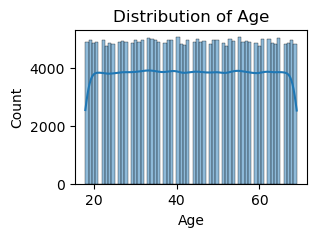

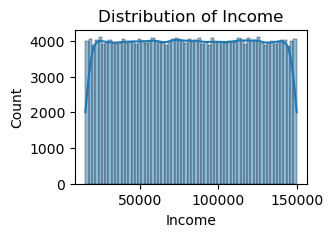

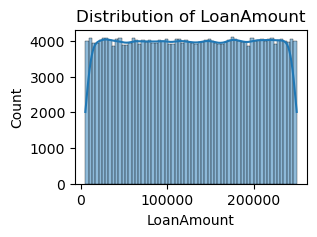

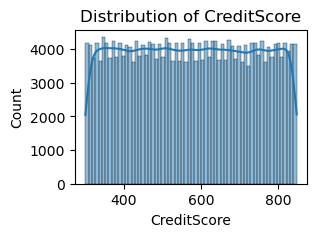

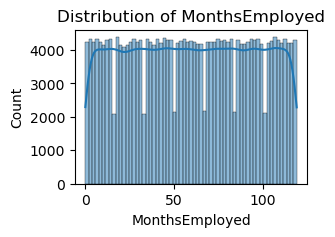

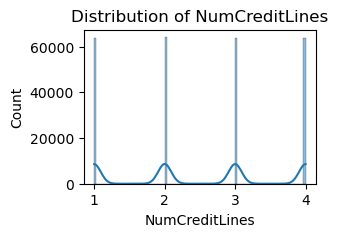

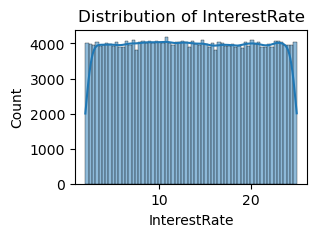

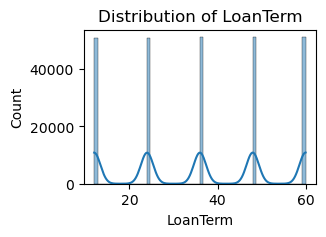

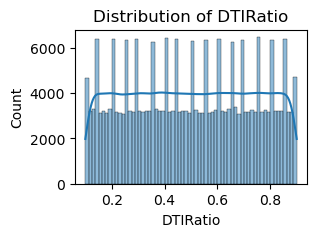

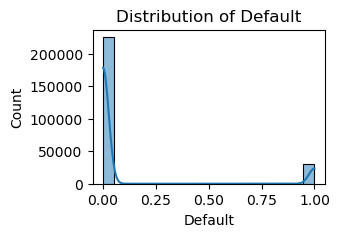

In [8]:
# Histograms to check distributions of numeric variables
for col in numeric_df:
    plt.figure(figsize=(3,2))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

#### Numeric Feature Distributions  
- **Age, CreditScore, DTIRatio, InterestRate**, **Income** and **LoanAmount**  are faily spread out across their values, with no extreme skew.  

In [9]:
# 1. Age bins
age_bins   = [18, 30, 45, 60, df['Age'].max()]  
age_labels = ['18–30', '31–45', '46–60', '61+']

df['Age_group'] = pd.cut(
    df['Age'],
    bins=age_bins,
    labels=age_labels,
    include_lowest=True
)

# 2. DTI ratio bins vs Default
dti_bins   = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]  
dti_labels = ['0–20%', '21–40%', '41–60%', '61–80%', '81–100%']

df['DTI_group'] = pd.cut(
    df['DTIRatio'],
    bins=dti_bins,
    labels=dti_labels,
    include_lowest=True
)
print("Default rate by DTI group:")
print(df.groupby('DTI_group')['Default'].mean(), "\n")

# 3. Credit Sore bins vs Default
df['CS_bin'] = pd.cut(df['CreditScore'], bins=[300, 500, 650, 800, 850],
                      labels=['300–500','501–650','651–800','801–850'])
print("Default rate by Credit Score bin:")
print(df.groupby('CS_bin')['Default'].mean(), "\n")


# 4. MonthsEmployed bins vs. default
df['Emp_bin'] = pd.cut(df['MonthsEmployed'], bins=[0,12,36,60,120],
                       labels=['<1yr','1–3yr','3–5yr','5+yr'])
print("Default rate by Months Employed bin:")
print(df.groupby('Emp_bin')['Default'].mean(), "\n")


# 5. Loan purpose, term, age groups, cosigners
for col in ['LoanPurpose','LoanTerm','Age_group','HasCoSigner']:
    print(f"Default rate by {col}:")
    print(df.groupby(col)['Default'].mean(), "\n")
   


Default rate by DTI group:
DTI_group
0–20%      0.103631
21–40%     0.111642
41–60%     0.118236
61–80%     0.122384
81–100%    0.121759
Name: Default, dtype: float64 

Default rate by Credit Score bin:
CS_bin
300–500    0.127560
501–650    0.116109
651–800    0.106419
801–850    0.098304
Name: Default, dtype: float64 

Default rate by Months Employed bin:
Emp_bin
<1yr     0.168050
1–3yr    0.148957
3–5yr    0.121028
5+yr     0.089161
Name: Default, dtype: float64 

Default rate by LoanPurpose:
LoanPurpose
Auto         0.118814
Business     0.123260
Education    0.118381
Home         0.102348
Other        0.117885
Name: Default, dtype: float64 

Default rate by LoanTerm:
LoanTerm
12    0.116176
24    0.116078
36    0.115685
48    0.115741
60    0.116961
Name: Default, dtype: float64 

Default rate by Age_group:
Age_group
18–30    0.193859
31–45    0.126953
46–60    0.077428
61+      0.050541
Name: Default, dtype: float64 

Default rate by HasCoSigner:
HasCoSigner
No     0.128661
Yes   

## Default Rate Insights
- **Lower** credit scores, **higher** DTI Ratio and **short** employment period are linked to **more defaults**.

- **Young** borrowers (18–30) default the most, while **older** groups show **lower risk**.

- Co-signers and longer work history **reduce default** rates.

- Loan purpose does not affect default as much, but business loans carry a **higher risk**.

- Loan term has **minimal effect** as the default rate is almost constant.

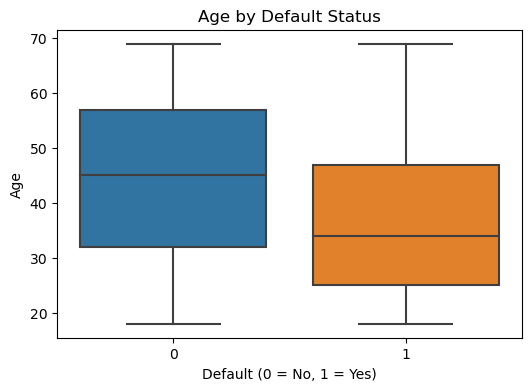

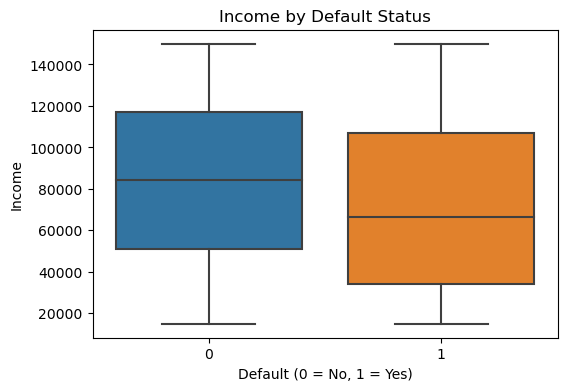

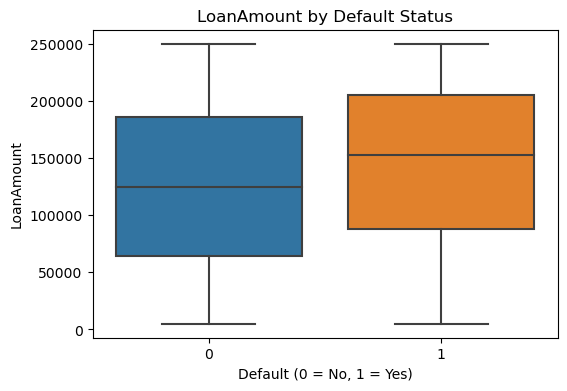

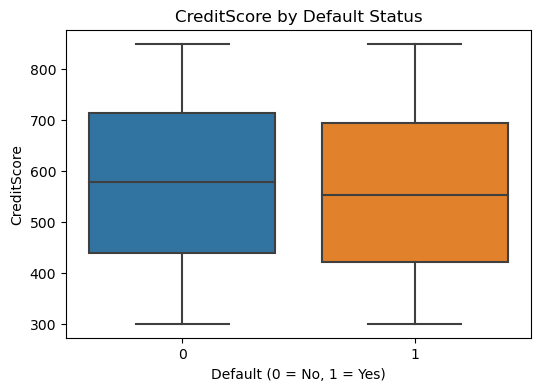

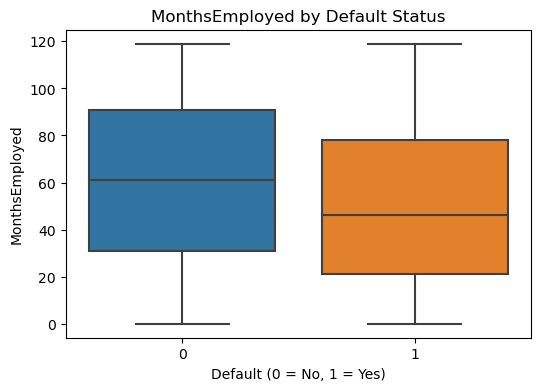

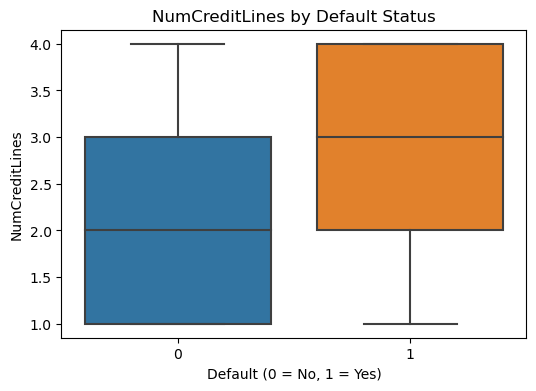

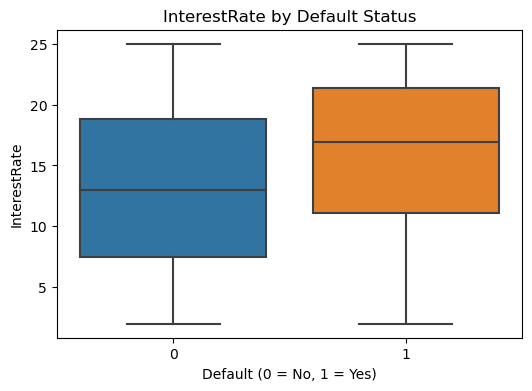

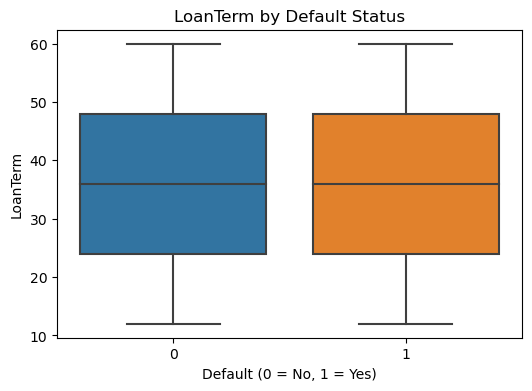

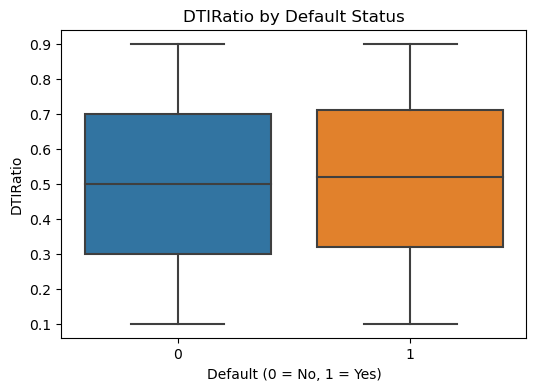

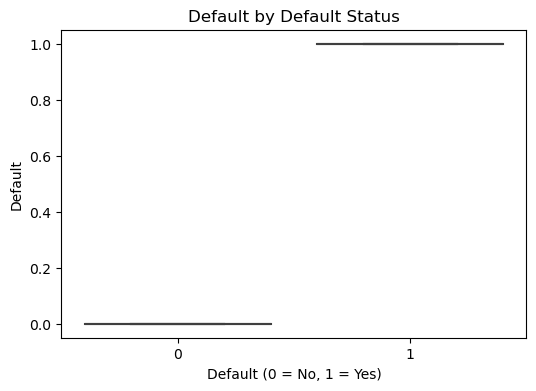

In [10]:
# Comparing the spread of each numeric feature by default outcome
for col in numeric_df:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Default', y=col, data=df)
    plt.title(f"{col} by Default Status")
    plt.xlabel("Default (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.show()

#### Numeric vs. Default(Box Plots)  
Borrowers who default tend to have:
- **Higher LoanAmount** and **InterestRate**
- **Lower CreditScore** and **Income** 
- **MonthsEmployed** is slightly **lower** for defaulters, indicating less job stability. 

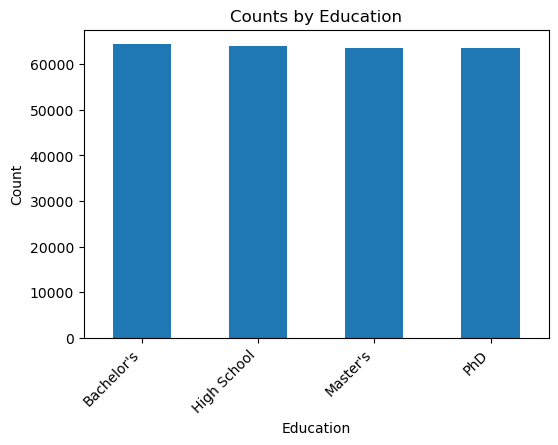

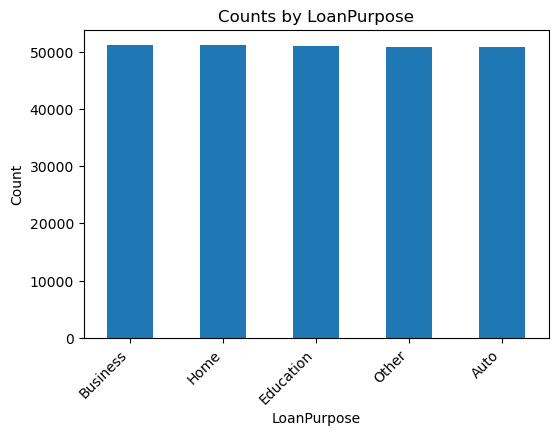

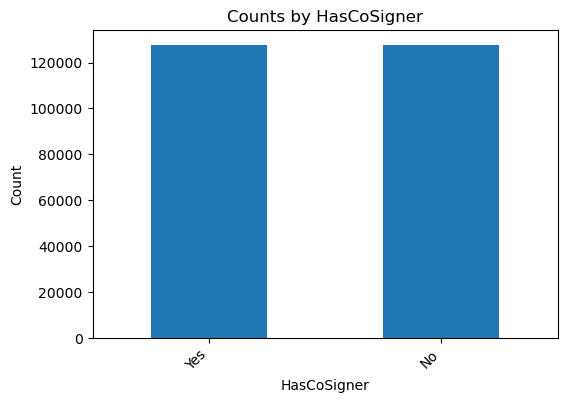

In [11]:
# Checking the count of categorical features
cat_cols = ['Education', 'LoanPurpose', 'HasCoSigner']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Counts by {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.show()

#### Categorical Feature Counts  
- **Education**, **LoanPurpose**,**HasCoSigner** are fairly balanced across the different categories. 
- This means that all groups are well represented in the dataset and this balance is good for modeling because it helps avoid bias towards one group.  

Overall default rate: 11.6%


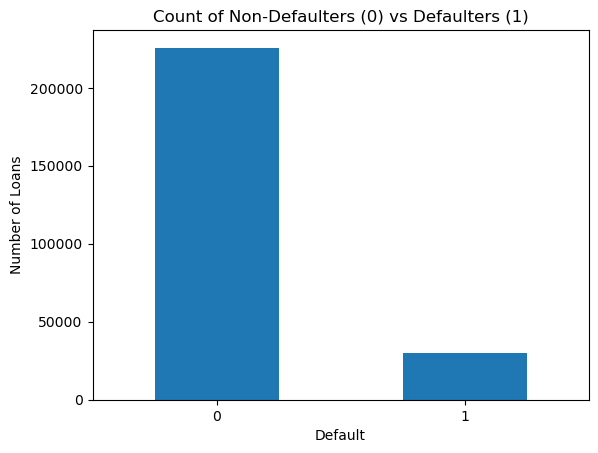

In [12]:
# Calculate and display default rate
default_rate = df['Default'].mean()
print(f"Overall default rate: {default_rate:.1%}")

# Show counts of each class
df['Default'].value_counts().plot(kind='bar', rot=0)
plt.title("Count of Non-Defaulters (0) vs Defaulters (1)")
plt.xlabel("Default")
plt.ylabel("Number of Loans")
plt.show()

### Default Class Distribution

The bar chart above shows a significant imbalance between non-defaulters and defaulters:

- ~11.6% of all loans ended in default.
- This means that majority of borrowers repaid their loans, with only a small fraction defaulting.
- This class imbalance can affect model training so techniques such as `class_weight='balanced'` will be needed to ensure the model learns patterns from both classes.

In [13]:
df_model = df.copy()
df_model.drop(columns=['Age_group', 'DTI_group', 'CS_bin', 'Emp_bin','LoanID'], inplace=True)

In [14]:
for col in ['HasMortgage','HasDependents','HasCoSigner']:
    df_model[col] = df_model[col].map({'Yes':1,'No':0})

# One-hot encode text categories 
df_model = pd.get_dummies(df_model,columns=['Education','EmploymentType','MaritalStatus','LoanPurpose'],drop_first=True)


In [15]:
df_model.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'HasMortgage',
       'HasDependents', 'HasCoSigner', 'Default', 'Education_High School',
       'Education_Master's', 'Education_PhD', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'LoanPurpose_Business',
       'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other'],
      dtype='object')

In [17]:
X = df_model.drop(columns=['Default'])
y = df_model['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [18]:
# Creation of one scaler object
scaler = StandardScaler()

# Fitting it on training data, transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [19]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
lr= LogisticRegression(max_iter=1000,class_weight='balanced')
lr.fit(X_train_scaled,y_train)

yhat_lr =lr.predict(X_test_scaled)
yhat_prob_lr =lr.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, yhat_lr))
print("ROC_AUC:", roc_auc_score(y_test, yhat_prob_lr))
print("Precision:",precision_score(y_test, yhat_lr))
print("Recall:", recall_score(y_test, yhat_lr))

Accuracy: 0.6764440963383591
ROC_AUC: 0.7531790943106407
Precision: 0.21956901572510193
Recall: 0.699207553532288


In [20]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(class_weight='balanced',random_state=42)
dt.fit(X_train, y_train)

yhat_dt= dt.predict(X_test)
yhat_prob_dt= dt.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, yhat_dt))
print("ROC_AUC:", roc_auc_score(y_test, yhat_prob_dt))
print("Precision:",precision_score(y_test, yhat_dt))
print("Recall:", recall_score(y_test, yhat_dt))

Accuracy: 0.8155472880360289
ROC_AUC: 0.5496631699198171
Precision: 0.20437214031520082
Recall: 0.20333839150227617


In [21]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42)
rf.fit(X_train,y_train)

yhat_rf= rf.predict(X_test)
yhat_prob_rf= rf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, yhat_rf))
print("ROC_AUC:", roc_auc_score(y_test, yhat_prob_rf))
print("Precision:",precision_score(y_test, yhat_rf))
print("Recall:", recall_score(y_test, yhat_rf))

Accuracy: 0.8849226551791658
ROC_AUC: 0.7377478746787461
Precision: 0.7368421052631579
Recall: 0.014162873039959535


In [22]:
from sklearn.ensemble import HistGradientBoostingClassifier
gb= HistGradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

yhat_gb= gb.predict(X_test)
yhat_prob_gb= gb.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, yhat_gb))
print("ROC_AUC:", roc_auc_score(y_test, yhat_prob_gb))
print("Precision:",precision_score(y_test, yhat_gb))
print("Recall:", recall_score(y_test, yhat_gb))

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


Accuracy: 0.8869003328764441
ROC_AUC: 0.756800553821632
Precision: 0.6197836166924265
Recall: 0.06761085820266396


# Model Performance Comparison
| Model               |   Accuracy |   ROC-AUC |   Precision |   Recall |
|:--------------------|-----------:|----------:|------------:|---------:|
| Logistic Regression |      0.676 |     0.753 |       0.220 |    0.699 |
| Decision Tree       |      0.815 |     0.550 |       0.204 |    0.203 |
| Random Forest       |      0.885 |     0.738 |       0.737 |    0.014 |
| Gradient Boosting   |      0.887 |     0.757 |       0.620 |    0.068 |

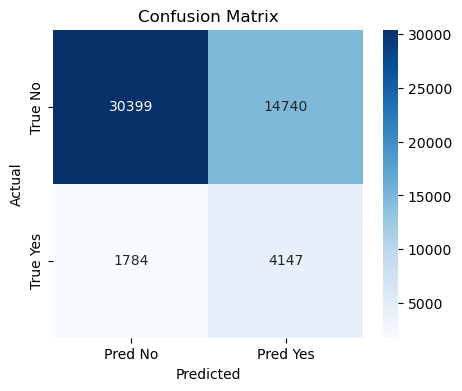

In [23]:
cm1 = confusion_matrix(y_test, yhat_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred No','Pred Yes'],
            yticklabels=['True No','True Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

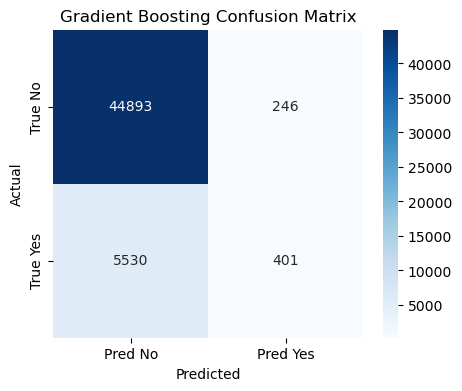

In [24]:
cm2 = confusion_matrix(y_test, yhat_gb)
plt.figure(figsize=(5,4))
sns.heatmap(
    cm2, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Pred No','Pred Yes'],
    yticklabels=['True No','True Yes']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

## Model Conclusion: Logistic Regression vs. Gradient Boosting
After testing multiple classifiers, Logistic Regression and Gradient Boosting emerged as the strongest models.

**Logistic Regression**

Accuracy: 67.6%

ROC-AUC: 0.753

Precision: 22.0%

Recall: 69.9%

Insight: Best for catching defaulters. Has a higher recall hence fewer risky loans are missed, though at the cost of flagging many good customers.

**Gradient Boosting**

Accuracy: 88.7%

ROC-AUC: 0.757

Precision: 62.0%

Recall: 6.8%

Insight: Very precise but misses most defaulters. It is useful where false positives are costly, but not ideal as a standalone screening tool.

**Recommendation:**
Use Logistic Regression as the primary model when reducing default risk is the top priority and Gradient Boosting may be used in a secondary layer or when operational costs of false positives are a bigger concern.

# Key Insights
The strongest predictors of default are:
- Credit Score
- DTI Ratio
- Months Employed
- Age
- Co-signer status

These insights can help guide loan approval decisions and segment borrowers based on default risk.

# Author
## Naomi Wanjiru